---
## Lab assignment 10 - Python - Code Generation with Generative AI Datei, Github: soneruen
---
Following the task for the lab assignment, I picked all data from: [Pokémon Database](https://pokemondb.net/pokedex/all).

---
Task 1: Webscraping 1a - 1b
---

In [50]:
# Webscraping: Task 1 a + b:

import requests  # Zum Senden von HTTP-Anfragen und Abrufen von Webseitendaten
from bs4 import BeautifulSoup  # Zum Parsen und Extrahieren von Daten aus HTML-Dokumenten
import pandas as pd  # Bietet Datenstrukturen zur effizienten Organisation und Analyse von Daten
from IPython.display import display, HTML  # Ermöglicht die Anzeige von HTML-Inhalten in Jupyter Notebook (important Library for the bonus task of // Wichtige Bibliothek für die Bonusaufgabe)

# Step 1: Send a request to the website
url = "https://pokemondb.net/pokedex/all"
response = requests.get(url)
response.raise_for_status()  # Check that request was successful

# Step 2: Parse the page content
soup = BeautifulSoup(response.text, 'html.parser')

# Step 3: Find the table
table = soup.find('table', {'id': 'pokedex'})

# Step 4: Extract the headers
headers = ['Sprite']  # Add a header for sprite images 
for header in table.find_all('th'):
    headers.append(header.text.strip())

# Step 5: Extract the rows
rows = []
for row in table.find_all('tr')[1:]:  # Skip the header row
    cols = row.find_all('td')
    # Extract the sprite image URL
    sprite_img = cols[0].find('img')['src']  
    row_data = [sprite_img] + [col.text.strip() for col in cols]
    rows.append(row_data)

# Step 6: Create a DataFrame
df = pd.DataFrame(rows, columns=headers)
# Optional: Display the DataFrame with Images
def path_to_image_html(path):
    return f'<img src="{path}" width="50" >'

# Use the display(HTML()) for environments that support HTML rendering
display(HTML(df.to_html(escape=False, formatters={'Sprite': path_to_image_html})))

## Meine kurze Erklärung des Codes, der von der AI erzeugt wurde:
# Der Code sammelt Daten von einer Pokémon-Webseite und erstellt eine Tabelle mit Informationen wie Bilder, Namen und Typen der Pokémon.
# Er lädt die Seite, liest die Tabelle aus, und speichert die Daten in einer übersichtlichen Form.
# Anschließend können die Informationen mit Bildern in einer HTML-fähigen Umgebung angezeigt (hier: Jupyter-Notebook in VS-Code genutzt, da dies in einer einfach py. File nicht ging).


,Sprite,#,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,,0001,Bulbasaur,Grass Poison,318,45,49,49,65,65,45
1,,0002,Ivysaur,Grass Poison,405,60,62,63,80,80,60
2,,0003,Venusaur,Grass Poison,525,80,82,83,100,100,80
3,,0003,Venusaur Mega Venusaur,Grass Poison,625,80,100,123,122,120,80
4,,0004,Charmander,Fire,309,39,52,43,60,50,65
5,,0005,Charmeleon,Fire,405,58,64,58,80,65,80
6,,0006,Charizard,Fire Flying,534,78,84,78,109,85,100
7,,0006,Charizard Mega Charizard X,Fire Dragon,634,78,130,111,130,85,100
8,,0006,Charizard Mega Charizard Y,Fire Flying,634,78,104,78,159,115,100
9,,0007,Squirtle,Water,314,44,48,65,50,64,43


---
Task 2: Exploratory Data Analysis: Using AI, 2a - 2d
---

In [ ]:
# 2a: What are the strongest pokemon (of each type)?# 2a: 
# Convert 'Total' column to numeric
df['Total'] = pd.to_numeric(df['Total'])

# Extract all types from 'Type' column
df['Type1'] = df['Type'].str.split().str[0]
df['Type2'] = df['Type'].str.split().str[1]

# Combine all types into a single series
all_types = pd.concat([df['Type1'], df['Type2']]).unique()

# Find the strongest Pokémon for each type
strongest_pokemon = {}
for type in all_types:
    if pd.notna(type):
        type_pokemon = df[(df['Type1'] == type) | (df['Type2'] == type)]
        if not type_pokemon.empty:
            strongest = type_pokemon.loc[type_pokemon['Total'].idxmax()]
            strongest_pokemon[type] = {
                'Name': strongest['Name'],
                'Total': strongest['Total']
            }

# Create a DataFrame from the results
strongest_df = pd.DataFrame.from_dict(strongest_pokemon, orient='index')
strongest_df = strongest_df.sort_values('Total', ascending=False)

# Display the results
print("Strongest Pokémon of each type:")
display(HTML(strongest_df.to_html()))

# Der Codeblock hier berechnet die durchschnittlichen Statistikwerte (HP, Attack, Defense, Sp. Atk, Sp. Def, Speed) für jedes Pokémon, gruppiert nach dem Primärtyp ('Type 1'), und zeigt diese als Tabelle an.

Strongest Pokémon of each type:


,Name,Total
Dragon,Eternatus Eternamax,1125
Poison,Eternatus Eternamax,1125
Fighting,Mewtwo Mega Mewtwo X,780
Flying,Rayquaza Mega Rayquaza,780
Psychic,Mewtwo Mega Mewtwo X,780
Fire,Groudon Primal Groudon,770
Ground,Groudon Primal Groudon,770
Water,Kyogre Primal Kyogre,770
Normal,Arceus,720
Fairy,Diancie Mega Diancie,700


In [29]:
# 2b: What are the best attackers? (My Top-15 List of any type, and sorted in the cell output starting by the highest)

# Ensure 'Attack' column is numeric
df['Attack'] = pd.to_numeric(df['Attack'])

# Sort Pokémon by Attack in descending order
best_attackers = df.sort_values('Attack', ascending=False)

# Display top 15 best attackers
print("Top 15 Best Attackers:")
top_15_attackers = best_attackers.head(15)

# Display with images and relevant information
columns_to_display = ['Sprite', 'Name', 'Type', 'Attack', 'Sp. Atk']
display(HTML(top_15_attackers[columns_to_display].to_html(escape=False, formatters={'Sprite': path_to_image_html})))

# Print additional statistics
print("\nStatistics of Top 15 Best Attackers:")
print(top_15_attackers[['Name', 'Type', 'Attack', 'Sp. Atk']].to_string(index=False))

# Der Codeblock stellt sicher, dass die `'Attack'`-Werte als Zahlen behandelt werden. Dann werden die Pokémon auf der Grundlage dieser Werte in absteigender Reihenfolge sortiert.
# Die Top 15 Pokémon mit den höchsten Angriffsstatistiken werden angezeigt, einschließlich ihrer Bilder und anderer Informationen wie Name, Typ und Spezialangriff.


Top 15 Best Attackers:


,Sprite,Name,Type,Attack,Sp. Atk
201,,Mewtwo Mega Mewtwo X,Psychic Fighting,190,154
274,,Heracross Mega Heracross,Bug Fighting,185,40
956,,Kartana,Grass Steel,181,59
473,,Groudon Primal Groudon,Ground Fire,180,150
475,,Rayquaza Mega Rayquaza,Dragon Flying,180,180
478,,Deoxys Attack Forme,Psychic,180,180
545,,Garchomp Mega Garchomp,Dragon Ground,170,120
777,,Kyurem Black Kyurem,Dragon Ice,170,120
961,,Necrozma Ultra Necrozma,Psychic Dragon,167,167
436,,Banette Mega Banette,Ghost,165,93



Statistics of Top 15 Best Attackers:
                        Name             Type  Attack  Sp. Atk
        Mewtwo Mega Mewtwo X Psychic Fighting     190      154
    Heracross Mega Heracross     Bug Fighting     185       40
                     Kartana      Grass Steel     181       59
      Groudon Primal Groudon      Ground Fire     180      150
      Rayquaza Mega Rayquaza    Dragon Flying     180      180
         Deoxys Attack Forme          Psychic     180      180
      Garchomp Mega Garchomp    Dragon Ground     170      120
         Kyurem Black Kyurem       Dragon Ice     170      120
     Necrozma Ultra Necrozma   Psychic Dragon     167      167
        Banette Mega Banette            Ghost     165       93
        Gallade Mega Gallade Psychic Fighting     165       65
           Calyrex Ice Rider      Psychic Ice     165       85
                   Rampardos             Rock     165       65
    Tyranitar Mega Tyranitar        Rock Dark     164       95
Darmanitan Galari

Average Stats for Each Pokémon Type:


,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total
Dragon,88.68,99.16,88.34,97.70,86.06,82.23,542.17
Steel,70.53,95.22,108.93,72.36,81.31,62.99,491.34
Psychic,75.16,75.99,76.68,95.40,87.63,77.26,488.11
Fighting,77.91,108.79,79.59,65.95,72.97,81.11,486.32
Ice,80.31,88.25,79.02,74.29,75.18,69.14,466.18
Dark,75.10,94.80,71.88,74.73,70.90,78.24,465.64
Fire,71.33,84.75,71.43,88.75,73.33,75.99,465.59
Flying,72.40,81.55,68.39,77.31,71.07,85.55,456.28
Ghost,66.49,79.40,78.91,83.75,78.40,67.82,454.77
Electric,66.85,75.52,69.31,86.20,70.03,82.82,450.72


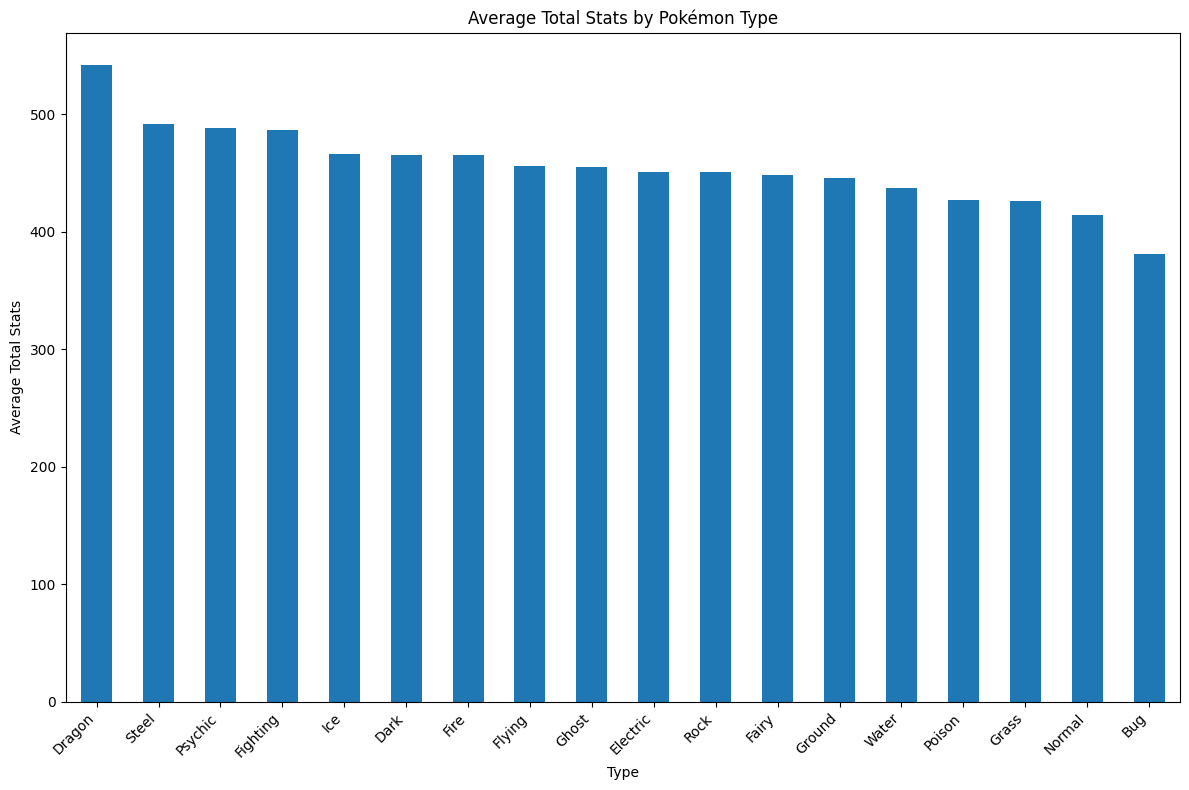

In [30]:
# 2c: What are the averages of stats for each type

import pandas as pd
import matplotlib.pyplot as plt

# Ensure all stat columns are numeric
stat_columns = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Total']
for col in stat_columns:
    df[col] = pd.to_numeric(df[col])

# Split the Type column into Type1 and Type2
df[['Type1', 'Type2']] = df['Type'].str.split(expand=True)

# Function to calculate average stats for a type
def avg_stats_for_type(type_name):
    type_df = df[(df['Type1'] == type_name) | (df['Type2'] == type_name)]
    return type_df[stat_columns].mean()

# Get unique types
all_types = set(df['Type1'].unique()) | set(df['Type2'].dropna().unique())

# Calculate average stats for each type
avg_stats = {type_name: avg_stats_for_type(type_name) for type_name in all_types}

# Create a DataFrame with the results
avg_stats_df = pd.DataFrame(avg_stats).T

# Sort by Total stat
avg_stats_df = avg_stats_df.sort_values('Total', ascending=False)

# Display the results
print("Average Stats for Each Pokémon Type:")
display(avg_stats_df.round(2))

# My Optional Task that I wanted to try out: Visualize the results but here only for average of totals stats for any type of pokemon
plt.figure(figsize=(12, 8))
avg_stats_df['Total'].plot(kind='bar')
plt.title('Average Total Stats by Pokémon Type')
plt.xlabel('Type')
plt.ylabel('Average Total Stats')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 1. Die Statistikspalten werden in numerische Werte konvertiert, um die Berechnungen zu erleichtern.
# 2. Der Code teilt die Spalte `'Type'` in zwei Spalten, `'Type1'` und `'Type2'`, auf, um das Dual-Typ-System von Pokémon zu berücksichtigen.
# 3. Für jeden Typ (egal ob Primär- oder Sekundärtyp) werden die durchschnittlichen Werte aller Statistikspalten berechnet.
# 4. Eine neue Tabelle wird erstellt, die die durchschnittlichen Statistiken für jeden Typ zeigt, sortiert nach der Gesamtstatistik.
# 5. Schließlich wird ein Balkendiagramm erstellt, das die durchschnittlichen Gesamtstatistiken der verschiedenen Pokémon-Typen visualisiert.

In [31]:
# 2d: List the top 3 Dragon-type Pokémon with the highest "Attack" Stat

# Ensure 'Attack' column is numeric
df['Attack'] = pd.to_numeric(df['Attack'])

# Filter for Dragon-type Pokémon
dragon_type_pokemon = df[(df['Type1'] == 'Dragon') | (df['Type2'] == 'Dragon')]

# Sort by Attack stat in descending order
top_dragon_attackers = dragon_type_pokemon.sort_values('Attack', ascending=False)

# Select the top 3
top_3_dragons = top_dragon_attackers.head(3)

# Display the results with relevant information
columns_to_display = ['Sprite', 'Name', 'Type', 'Attack']
display(HTML(top_3_dragons[columns_to_display].to_html(escape=False, formatters={'Sprite': path_to_image_html})))

# Print additional statistics
print("\nTop 3 Dragon-type Pokémon with Highest Attack:")
print(top_3_dragons[['Name', 'Type', 'Attack']].to_string(index=False))

# Dieser Block des Codes identifiziert die Top 3 Drachen-Pokémon mit den höchsten Angriffsstatistiken, indem er zuerst die Pokémon nach dem Drachen-Typ filtert,
# dann nach ihrer Angriffsstatistik sortiert und schließlich die besten drei Ergebnisse anzeigt - Hier wieder im Format der Listenansicht durch den Print "display(HTML".


,Sprite,Name,Type,Attack
475,,Rayquaza Mega Rayquaza,Dragon Flying,180
545,,Garchomp Mega Garchomp,Dragon Ground,170
777,,Kyurem Black Kyurem,Dragon Ice,170



Top 3 Dragon-type Pokémon with Highest Attack:
                  Name          Type  Attack
Rayquaza Mega Rayquaza Dragon Flying     180
Garchomp Mega Garchomp Dragon Ground     170
   Kyurem Black Kyurem    Dragon Ice     170


---

## Pokédex Application: Using Python GUI

In diesem Projekt habe ich mit Hilfe der TH-KI (GPT-4o) einen eigenen Pokédex entwickelt. Der Pokédex ist eine interaktive Anwendung, die Informationen über alle Pokémon anzeigt – von ihrem Typ über ihre Statistiken bis hin zu Bildern. Die Daten werden durch Webscraping abgerufen und in einer benutzerfreundlichen grafischen Oberfläche dargestellt.

Verwendete Bibliotheken

- requests:
  - Ermöglicht das Senden von HTTP-Anfragen in Python, um Webseiten zu laden oder Daten von APIs abzurufen.
  - Wird genutzt, um die HTML-Daten der Pokémon-Website herunterzuladen.

- BeautifulSoup (bs4):
  - Eine Bibliothek zum Parsen von HTML- und XML-Dokumenten, die das Extrahieren von Informationen aus Webseiten erleichtert.
  - Verwendet, um die HTML-Daten der Pokémon-Website zu durchsuchen und die benötigten Informationen zu extrahieren.

- tkinter:
  - Das Standardmodul für grafische Benutzeroberflächen (GUIs) in Python.
  - Nutzt `ttk`, eine Erweiterung für stilisierte Widgets, um die Benutzeroberfläche der Anwendung zu erstellen.

- Pillow (PIL):
  - Ein Bildverarbeitungsmodul für Python, das die Arbeit mit Bildern erleichtert.
  - Verwendet zum Laden und Anzeigen von Pokémon-Bildern in der `tkinter`-Oberfläche.

- io:
  - Eine Python-Standardbibliothek, die verschiedene Arten von I/O-Operationen (Input/Output) unterstützt.
  - Verwendet, um Bilddaten aus einem HTTP-Response in einen binären Stream zu konvertieren für die Verarbeitung durch `Pillow`.


In [3]:
# Task 3 BONUS: Own Pokedex Application (Python-GUI)
import requests
from bs4 import BeautifulSoup
import tkinter as tk
from tkinter import ttk
from PIL import Image, ImageTk
import io

# Farben für die verschiedenen Pokémon-Typen
TYPE_COLORS = {
    "normal": "#A8A77A",
    "fire": "#EE8130",
    "water": "#6390F0",
    "electric": "#F7D02C",
    "grass": "#7AC74C",
    "ice": "#96D9D6",
    "fighting": "#C22E28",
    "poison": "#A33EA1",
    "ground": "#E2BF65",
    "flying": "#A98FF3",
    "psychic": "#F95587",
    "bug": "#A6B91A",
    "rock": "#B6A136",
    "ghost": "#735797",
    "dragon": "#6F35FC",
    "dark": "#705746",
    "steel": "#B7B7CE",
    "fairy": "#D685AD"
}

def fetch_pokemon_data():
    url = "https://pokemondb.net/pokedex/all"
    response = requests.get(url)
    response.raise_for_status()
    soup = BeautifulSoup(response.text, 'html.parser')

    table = soup.find('table', {'id': 'pokedex'})
    pokemon_list = []

    for index, row in enumerate(table.find_all('tr')[1:], start=1):
        cols = row.find_all('td')
        name = cols[1].text.strip()
        img_url = cols[0].find('img')['src']
        type_span = cols[2].find_all('a', class_='type-icon')
        types = [t.text.strip().lower() for t in type_span]
        stats = [int(col.text.strip()) for col in cols[3:]]
        pokemon_list.append((index, name, img_url, types, *stats))

    return pokemon_list

def update_table(search_term="", filter_type="all"):
    for row in tree.get_children():
        tree.delete(row)

    for pokemon in all_pokemon:
        index, name, _, types, total, hp, attack, defense, sp_atk, sp_def, speed = pokemon
        if (search_term.lower() in name.lower() or search_term == str(index)) and (filter_type == "all" or any(filter_type == t for t in types)):
            tree.insert("", "end", values=(index, name, ','.join(types), total, hp, attack, defense, sp_atk, sp_def, speed))

    # Select the first Pokémon automatically
    if tree.get_children():
        first_item = tree.get_children()[0]
        tree.selection_set(first_item)
        tree.focus(first_item)
        show_details()

def sort_by_column(tree, col, descending=False):
    data_list = [(tree.set(child, col), child) for child in tree.get_children('')]
    data_list.sort(reverse=descending, key=lambda t: int(t[0]) if col in ['#', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'] else t[0])

    for index, (val, child) in enumerate(data_list):
        tree.move(child, '', index)

    tree.heading(col, command=lambda: sort_by_column(tree, col, not descending))

def show_details(event=None):
    clear_details()

    selected_item = tree.selection()
    if not selected_item:
        return

    selected_values = tree.item(selected_item, 'values')
    selected_pokemon_index = int(selected_values[0]) - 1
    selected_pokemon = all_pokemon[selected_pokemon_index]

    display_image(selected_pokemon[2])
    display_types(selected_pokemon[3])
    display_name(selected_pokemon[1])

    stats = [
        ("HP", selected_pokemon[5], 255, "#7AC74C"),
        ("Attack", selected_pokemon[6], 190, "#7AC74C"),
        ("Defense", selected_pokemon[7], 230, "#7AC74C"),
        ("Sp. Atk", selected_pokemon[8], 194, "#7AC74C"),
        ("Sp. Def", selected_pokemon[9], 230, "#7AC74C"),
        ("Speed", selected_pokemon[10], 200, "#7AC74C")
    ]
    for stat_name, value, max_value, color in stats:
        create_bar(details_box, stat_name, value, max_value, color)

def clear_details():
    for widget in details_box.winfo_children():
        widget.destroy()
    for widget in type_labels_frame.winfo_children():
        widget.destroy()

def display_image(img_url):
    response = requests.get(img_url)
    img_data = Image.open(io.BytesIO(response.content))
    img_data = img_data.resize((160, 160), Image.LANCZOS) 
    img = ImageTk.PhotoImage(img_data)
    img_label.config(image=img)
    img_label.image = img

def display_types(types):
    for t in types:
        type_label = tk.Label(type_labels_frame, text=t.capitalize(), bg=TYPE_COLORS.get(t, "#FFFFFF"), fg="white", font=("Roboto", 14, "bold"), padx=5, pady=3)
        type_label.pack(side=tk.LEFT, padx=3, pady=3)

def display_name(name):
    name_label.config(text=name, font=("Calibri", 19, "bold"))

def create_bar(container, label_text, value, max_value, color):
    bar_frame = tk.Frame(container, bg="#2c2f33")
    bar_frame.pack(fill=tk.X, pady=2)

    bar_label = tk.Label(bar_frame, text=f"{label_text}: {value}", font=("Roboto", 12), fg="#f5f5f5", bg="#2c2f33")
    bar_label.pack(side=tk.LEFT, padx=5)

    style_name = f"{label_text}.Horizontal.TProgressbar"
    style = ttk.Style()
    style.configure(style_name, troughcolor="#2c2f33", background=color)

    progress = ttk.Progressbar(bar_frame, style=style_name, orient="horizontal", length=200, mode='determinate', maximum=max_value, value=value)
    progress.pack(side=tk.LEFT, padx=5, fill=tk.X, expand=True)

def update_size_label(event=None):
    size_label.config(text=f"Size: {root.winfo_width()}x{root.winfo_height()}")

# Fetch Pokémon data
all_pokemon = fetch_pokemon_data()

# Create the main Tkinter window
root = tk.Tk()
root.title("Pokédex")
root.geometry("1350x600")
root.configure(bg="#2c2f33")

# Setup Treeview style to increase font size
style = ttk.Style()
style.configure("Treeview", rowheight=30, font=("Roboto", 11))
style.configure("Treeview.Heading", font=("Roboto", 11, "bold"))

# Title Label
title_label = tk.Label(root, text="Pokédex (soneruen)", font=("Roboto", 20, "bold"), fg="#f5f5f5", bg="#2c2f33")
title_label.pack(pady=5)

# Search Bar and Type Filter
search_frame = tk.Frame(root, bg="#2c2f33")
search_frame.pack(pady=5, fill=tk.X)

search_var = tk.StringVar()
search_var.trace("w", lambda name, index, mode: update_table(search_var.get(), type_filter_var.get().lower()))
search_entry = tk.Entry(search_frame, textvariable=search_var, width=30, font=("Roboto", 14), bg="#23272a", fg="#f5f5f5", insertbackground='white')
search_entry.pack(side=tk.LEFT, padx=5, fill=tk.X, expand=True)

type_options = ["All"] + [key.capitalize() for key in TYPE_COLORS.keys()]
type_filter_var = tk.StringVar(value="All")
type_filter_menu = tk.OptionMenu(search_frame, type_filter_var, *type_options, command=lambda _: update_table(search_var.get(), type_filter_var.get().lower()))
type_filter_menu.config(width=10, font=("Roboto", 14), bg="#23272a", fg="#f5f5f5")
type_filter_menu.pack(side=tk.LEFT, padx=5)

# Display the window size
size_label = tk.Label(root, text="", font=("Roboto", 12), fg="#f5f5f5", bg="#2c2f33")
size_label.pack()
root.bind("<Configure>", update_size_label)

# Main Content Frame
content_frame = tk.Frame(root, bg="#2c2f33")
content_frame.pack(fill=tk.BOTH, expand=True)

# Create Treeview Widget
table_frame = tk.Frame(content_frame)
table_frame.pack(side=tk.LEFT, padx=10, fill=tk.BOTH, expand=True)

table_columns = ["#", "Name", "Types", "Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]
tree_scroll_y = tk.Scrollbar(table_frame, orient="vertical")
tree_scroll_x = tk.Scrollbar(table_frame, orient="horizontal")
tree = ttk.Treeview(table_frame, columns=table_columns, show='headings', yscrollcommand=tree_scroll_y.set, xscrollcommand=tree_scroll_x.set)

tree_scroll_y.pack(side=tk.RIGHT, fill=tk.Y)
tree_scroll_x.pack(side=tk.BOTTOM, fill=tk.X)
tree_scroll_y.config(command=tree.yview)
tree_scroll_x.config(command=tree.xview)

for col in table_columns:
    tree.heading(col, text=col, command=lambda _col=col: sort_by_column(tree, _col))
    tree.column(col, anchor="center", width=70)
tree.pack(fill=tk.BOTH, expand=True)

# Pokemon Image and Details
details_frame = tk.Frame(content_frame, bg="#2c2f33")
details_frame.pack(side=tk.LEFT, padx=10, pady=10, fill=tk.BOTH, expand=True)

# Image Display
img_label = tk.Label(details_frame, bg="#2c2f33", relief='solid', bd=1)
img_label.pack(pady=10, padx=10, anchor='n', fill=tk.X, expand=False)

# Type Icons
type_labels_frame = tk.Frame(details_frame, bg="#23272a")
type_labels_frame.pack(padx=5, pady=5, fill=tk.X, expand=False)

# Pokémon Name Display
name_label = tk.Label(details_frame, text="", font=("Calibri", 16, "bold"), bg="#2c2f33", fg="#f5f5f5")
name_label.pack(pady=5)

# Details Box for stats
details_box = tk.Frame(details_frame, bg="#2c2f33", relief='raised', bd=2)
details_box.pack(padx=5, pady=5, fill=tk.BOTH, expand=True)

# Bind Treeview Selection Event
tree.bind('<<TreeviewSelect>>', show_details)

# Populate initial table data
update_table()

# Start Tkinter main loop
root.mainloop()